In [ ]:
!pip install yfinance

import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline


     |████████████████████████████████| 6.3 MB 5.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
df = yf.download("VDE VAW VIS VCR VDC VHT VFH VGT VOX VPU VNQ", period="1y", interval = "1d")['Adj Close']

[*********************100%***********************]  11 of 11 completed


In [ ]:
# Estimated yearly returns for individual ETF
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

VAW    0.214759
VCR    0.270513
VDC    0.081508
VDE    0.568777
VFH    0.344686
VGT    0.289100
VHT    0.134456
VIS    0.173862
VNQ    0.305041
VOX    0.126203
VPU    0.092285
dtype: float64

In [ ]:
# Variance for individual ETF
df.resample('Y').last().pct_change().var()

VAW   NaN
VCR   NaN
VDC   NaN
VDE   NaN
VFH   NaN
VGT   NaN
VHT   NaN
VIS   NaN
VNQ   NaN
VOX   NaN
VPU   NaN
dtype: float64

In [ ]:
# Correlation Coefficient Matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
VAW,1.000000,0.593288,0.536523,0.627597,0.811063,0.419322,0.505985,0.879240,0.471397,0.458032,0.314251
VCR,0.593288,1.000000,0.447591,0.322055,0.518878,0.764964,0.535447,0.677046,0.525454,0.692960,0.292001
VDC,0.536523,0.447591,1.000000,0.279095,0.499044,0.404652,0.536724,0.601269,0.609307,0.483446,0.635335
VDE,0.627597,0.322055,0.279095,1.000000,0.691871,0.170801,0.210417,0.617167,0.263303,0.307103,0.032717
VFH,0.811063,0.518878,0.499044,0.691871,1.000000,0.330439,0.414729,0.872232,0.467336,0.457132,0.332690
VGT,0.419322,0.764964,0.404652,0.170801,0.330439,1.000000,0.646568,0.508711,0.501248,0.751721,0.249383
VHT,0.505985,0.535447,0.536724,0.210417,0.414729,0.646568,1.000000,0.546129,0.492194,0.561140,0.460512
VIS,0.879240,0.677046,0.601269,0.617167,0.872232,0.508711,0.546129,1.000000,0.582169,0.559297,0.399357
VNQ,0.471397,0.525454,0.609307,0.263303,0.467336,0.501248,0.492194,0.582169,1.000000,0.504384,0.599023
VOX,0.458032,0.692960,0.483446,0.307103,0.457132,0.751721,0.561140,0.559297,0.504384,1.000000,0.348457


In [ ]:
# VIS, VFH and VOX are now removed due to their high correlation coefficients
df = yf.download("VDE VAW VCR VDC VHT VGT VPU VNQ", period="1y", interval = "1d")['Adj Close']

[*********************100%***********************]  8 of 8 completed


In [ ]:
df

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
Date,,,,,,,,
2020-12-01,151.776642,262.638519,169.131577,48.032093,335.591339,214.356720,82.148384,133.915482
2020-12-02,150.006760,260.214508,167.631119,49.517815,335.184418,215.402740,81.501472,134.612488
2020-12-03,149.190659,262.648468,168.371597,50.073765,335.392853,215.392883,82.187004,133.402390
2020-12-04,152.494415,263.771088,169.803864,52.805584,339.154602,218.175705,83.442207,132.221298
2020-12-07,151.550476,265.122162,169.131577,51.540325,339.998230,217.021133,82.718040,132.879623
...,...,...,...,...,...,...,...,...
2021-11-24,192.429993,351.940002,190.169998,81.529999,452.309998,254.309998,111.089996,148.660004
2021-11-26,188.869995,343.179993,187.259995,78.000000,442.119995,252.660004,108.000000,146.179993
2021-11-29,189.270004,346.670013,187.979996,78.550003,452.149994,252.649994,108.800003,148.199997


In [ ]:
# Covariance Matrix
cov_matrix = df.pct_change().cov()
cov_matrix

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
VAW,0.000128,0.000070,0.000041,0.000141,0.000055,0.000043,0.000049,0.000033
VCR,0.000070,0.000107,0.000031,0.000066,0.000093,0.000042,0.000050,0.000028
VDC,0.000041,0.000031,0.000045,0.000037,0.000031,0.000027,0.000037,0.000040
VDE,0.000141,0.000066,0.000037,0.000393,0.000039,0.000032,0.000048,0.000006
VGT,0.000055,0.000093,0.000031,0.000039,0.000136,0.000057,0.000053,0.000027
VHT,0.000043,0.000042,0.000027,0.000032,0.000057,0.000057,0.000034,0.000033
VNQ,0.000049,0.000050,0.000037,0.000048,0.000053,0.000034,0.000083,0.000051
VPU,0.000033,0.000028,0.000040,0.000006,0.000027,0.000033,0.000051,0.000087


In [ ]:
# Correlation Coefficient Matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
VAW,1.000000,0.593289,0.536523,0.627597,0.419322,0.505984,0.471398,0.314249
VCR,0.593289,1.000000,0.447591,0.322055,0.764964,0.535446,0.525455,0.292001
VDC,0.536523,0.447591,1.000000,0.279094,0.404652,0.536724,0.609308,0.635335
VDE,0.627597,0.322055,0.279094,1.000000,0.170801,0.210417,0.263303,0.032716
VGT,0.419322,0.764964,0.404652,0.170801,1.000000,0.646568,0.501248,0.249382
VHT,0.505984,0.535446,0.536724,0.210417,0.646568,1.000000,0.492194,0.460510
VNQ,0.471398,0.525455,0.609308,0.263303,0.501248,0.492194,1.000000,0.599023
VPU,0.314249,0.292001,0.635335,0.032716,0.249382,0.460510,0.599023,1.000000


In [ ]:
# Estimated yearly returns for individual ETF
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

VAW    0.214759
VCR    0.270513
VDC    0.081508
VDE    0.568777
VGT    0.289100
VHT    0.134456
VNQ    0.305041
VPU    0.092285
dtype: float64

In [ ]:
# Variance for individual ETF
df.resample('Y').last().pct_change().var()

VAW   NaN
VCR   NaN
VDC   NaN
VDE   NaN
VGT   NaN
VHT   NaN
VNQ   NaN
VPU   NaN
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

VAW    0.179056
VCR    0.164191
VDC    0.105709
VDE    0.312642
VGT    0.184825
VHT    0.119908
VNQ    0.144548
VPU    0.147942
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
VAW,0.214759,0.179056
VCR,0.270513,0.164191
VDC,0.081508,0.105709
VDE,0.568777,0.312642
VGT,0.289100,0.184825
VHT,0.134456,0.119908
VNQ,0.305041,0.144548
VPU,0.092285,0.147942


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 100000

In [ ]:
# Generate the set of minimum variance portfolio
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data = {'Returns':p_ret, 'Volatility':p_vol}

In [ ]:
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)

In [ ]:
# global minimum variance portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns       0.128511
Volatility    0.099792
VAW weight    0.036352
VCR weight    0.049542
VDC weight    0.430141
VDE weight    0.013934
VGT weight    0.021092
VHT weight    0.248136
VNQ weight    0.029726
VPU weight    0.171077
Name: 86941, dtype: float64

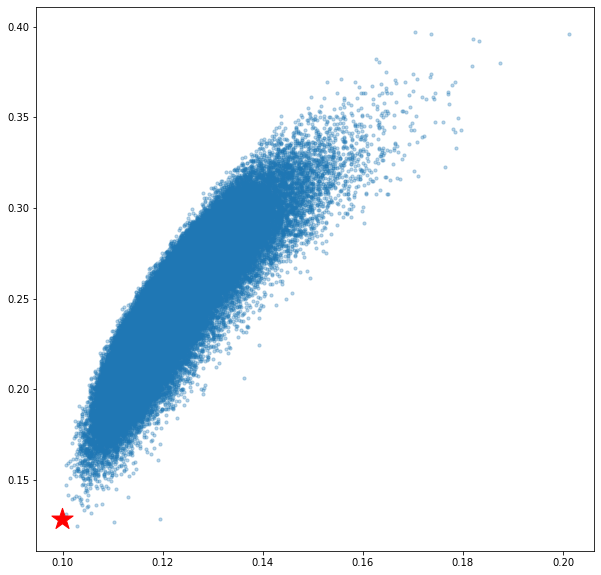

In [ ]:
# global minimum variance portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# tangency portfolio
rf = 0.0024 # risk free rate, from https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.350716
Volatility    0.143619
VAW weight    0.005351
VCR weight    0.039928
VDC weight    0.002202
VDE weight    0.295758
VGT weight    0.151616
VHT weight    0.089096
VNQ weight    0.357966
VPU weight    0.058083
Name: 21459, dtype: float64

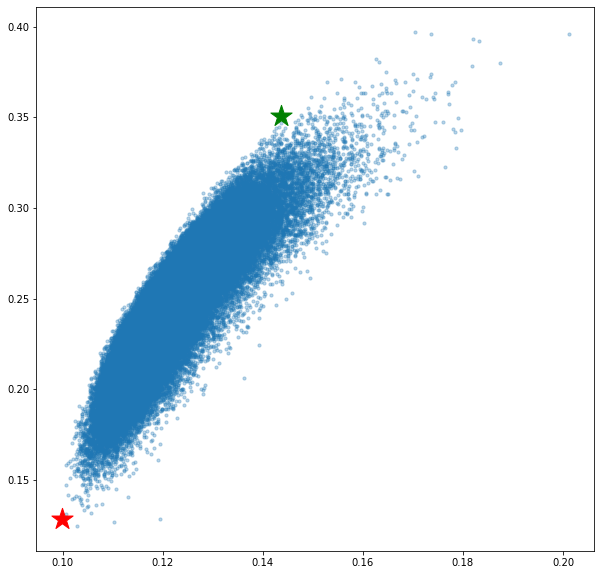

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [ ]:
# Sharpe ratio
sharpe_ratio = (optimal_risky_port['Returns']-rf)/optimal_risky_port['Volatility']
sharpe_ratio

2.4252789718876384